In [18]:
# Step 1: Loading and Preprocessing the Image Data

In [28]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [20]:
# If Internet available or follow below cell procedure


# (train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize the pixel values to be between 0 and 1
# train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
# test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
# train_labels = tf.keras.utils.to_categorical(train_labels, 10)
# test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [21]:
train_csv_path = 'Dataset/CIFAR 10/Download/cifar10_train.csv'
test_csv_path = 'Dataset/CIFAR 10/Download/cifar10_test.csv'

# use the below cell to download the datasets

In [22]:
# cifar10 = tf.keras.datasets.cifar10
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()

# x_train_flat = x_train.reshape(x_train.shape[0], -1)
# x_test_flat = x_test.reshape(x_test.shape[0], -1)

# train_images_df = pd.DataFrame(x_train_flat)
# train_labels_df = pd.DataFrame(y_train, columns=['label'])
# test_images_df = pd.DataFrame(x_test_flat)
# test_labels_df = pd.DataFrame(y_test, columns=['label'])

# train_combined_df = pd.concat([train_images_df, train_labels_df], axis=1)
# test_combined_df = pd.concat([test_images_df, test_labels_df], axis=1)

# train_combined_df.to_csv(train_csv_path, index=False)
# test_combined_df.to_csv(test_csv_path, index=False)

In [23]:
train_data = pd.read_csv(train_csv_path)
test_data = pd.read_csv(test_csv_path)

In [24]:
train_labels = train_data['label'].values
train_images = train_data.drop(columns=['label']).values

test_labels = test_data['label'].values
test_images = test_data.drop(columns=['label']).values

In [25]:
train_images = train_images.reshape(-1, 32, 32, 3).astype('float32') / 255.0
test_images = test_images.reshape(-1, 32, 32, 3).astype('float32') / 255.0

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [26]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

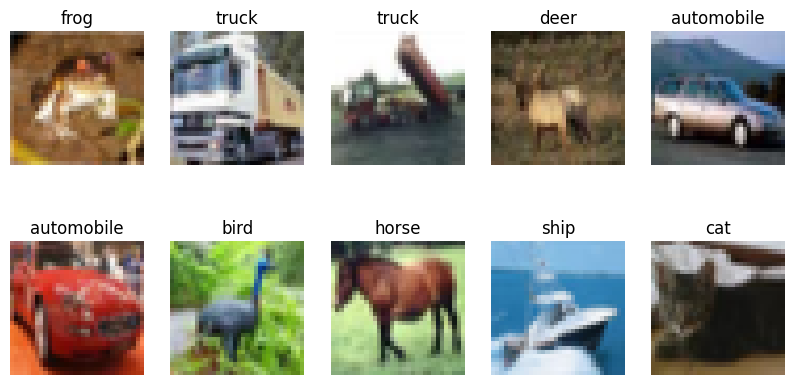

In [27]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i].argmax()])
    plt.axis('off')
plt.show()

In [ ]:
# Step 2: Defining the Model’s Architecture

In [30]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

C:\Program Files\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)               │ (None, 30, 30, 32)    │          896 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_1 (Conv2D)             │ (None, 28, 28, 32)    │        9,248 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 14, 14, 32)    │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_2 (Conv2D)             │ (None, 12, 12, 64)    │       18,496 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_3 (Conv2D)             │ (None, 10, 10, 64)    │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_1               │ (None, 5, 5, 64)      │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_4 (Conv2D)             │ (None, 3, 3, 128)     │       73,856 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_2               │ (None, 1, 1, 128)     │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten (Flatten)             │ (None, 128)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense (Dense)                 │ (None, 128)           │       16,512 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout (Dropout)             │ (None, 128)           │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_1 (Dense)               │ (None, 10)            │        1,290 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 157,226 (614.16 KB)

 Trainable params: 157,226 (614.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 3: Training the Model

In [32]:
history = model.fit(train_images, train_labels, 
                    epochs=20,
                    batch_size=64,
                    validation_data=(test_images, test_labels))

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 78ms/step - accuracy: 0.2453 - loss: 1.9872 - val_accuracy: 0.4544 - val_loss: 1.4535
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 80ms/step - accuracy: 0.4812 - loss: 1.4257 - val_accuracy: 0.5545 - val_loss: 1.2385
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 100ms/step - accuracy: 0.5633 - loss: 1.2303 - val_accuracy: 0.6048 - val_loss: 1.1259
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 97ms/step - accuracy: 0.6142 - loss: 1.0985 - val_accuracy: 0.6372 - val_loss: 1.0365
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.6486 - loss: 1.0052 - val_accuracy: 0.6639 - val_loss: 0.9622
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 94ms/step - accuracy: 0.6820 - loss: 0.9112 - val_accuracy: 0.6785 - val_loss: 0.9418
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 95ms/step - accuracy: 0.7094 - loss: 0.8427 - val_accuracy: 0.6822 - val_loss: 0.9321
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 112ms/step - accuracy: 0.7221 - loss: 0.7904 

In [ ]:
# Step 4: Estimating the Model’s Performance

In [33]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test Accuracy ", test_acc)

313/313 - 5s - 16ms/step - accuracy: 0.7162 - loss: 1.0353
Test Accuracy  0.7161999940872192


In [35]:
predictions = model.predict(test_images)
predicted_classes = predictions.argmax(axis=1)
true_classes = test_labels.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


In [38]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, predicted_classes, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.72      0.72      0.72      1000
  automobile       0.88      0.81      0.84      1000
        bird       0.58      0.66      0.62      1000
         cat       0.58      0.50      0.54      1000
        deer       0.60      0.74      0.67      1000
         dog       0.68      0.62      0.65      1000
        frog       0.78      0.78      0.78      1000
       horse       0.76      0.76      0.76      1000
        ship       0.82      0.78      0.80      1000
       truck       0.81      0.78      0.79      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



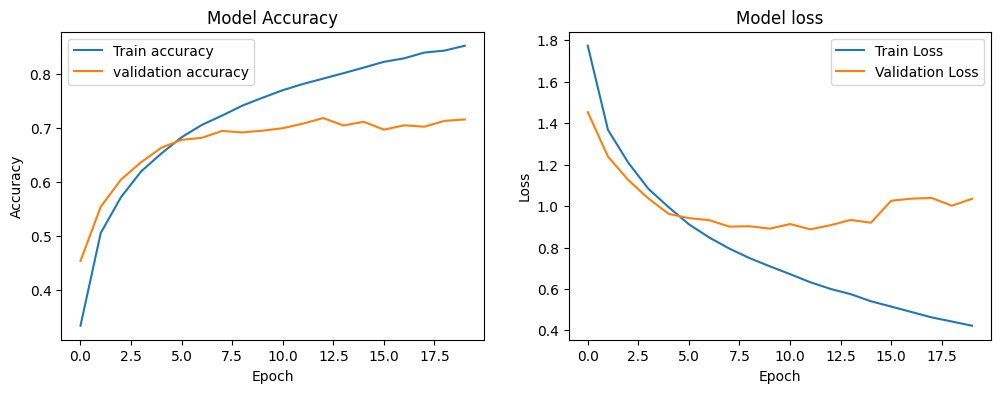

In [40]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model loss')
plt.legend()

plt.show()

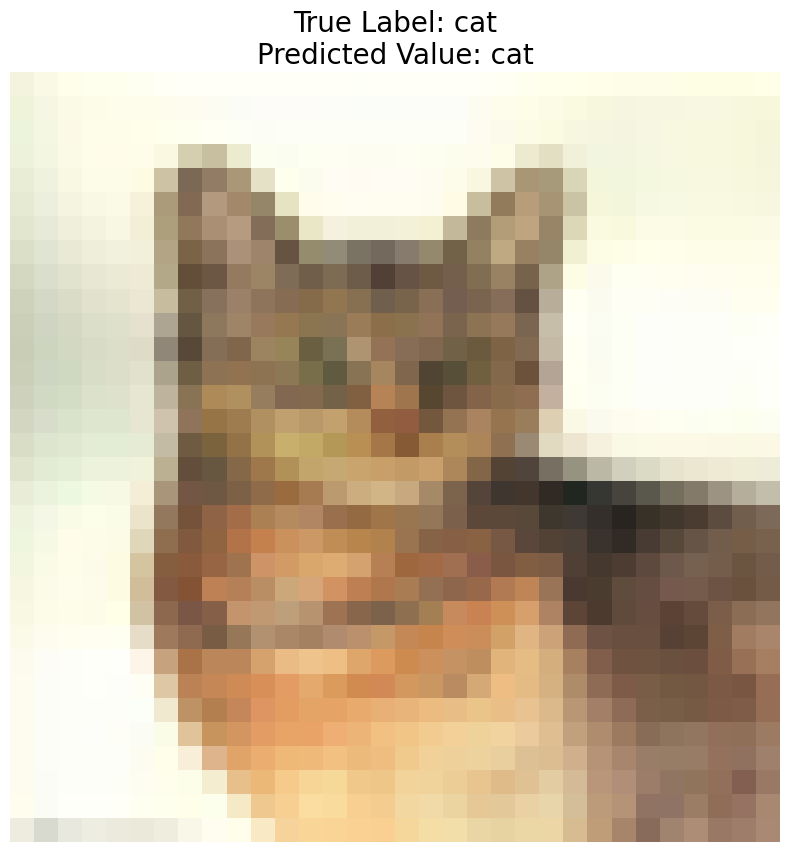

In [42]:
index = 786

true_label = class_names[np.argmax(test_labels[index])]
predicted_label = class_names[np.argmax(predictions[index], axis=0)]

plt.figure(figsize=[10, 10])
plt.imshow(test_images[index].reshape(32, 32, -1))
plt.title(f"True Label: {true_label}\nPredicted Value: {predicted_label}", size=20)
plt.axis('off')
plt.show()